# HEART DISEASE PREDICTION 

# Import Libraries 

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, auc, precision_recall_curve
)

# Load Data 

In [26]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset-3k-rows-python-code-2025/heart_disease_dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
0,67,1,2,111,536,0,2,88,0,1.3,3,2,3,1,0,23.4,0
1,57,1,3,109,107,0,2,119,0,5.4,2,0,3,0,1,35.4,0
2,43,1,4,171,508,0,1,113,0,3.7,3,0,7,1,1,29.9,0
3,71,0,4,90,523,0,2,152,0,4.7,2,1,3,1,0,15.2,1
4,36,1,2,119,131,0,2,128,0,5.9,3,1,3,1,0,16.7,1


# Data Analysis

In [27]:
df.size

52173

In [28]:
df.isnull().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
smoking          0
diabetes         0
bmi              0
heart_disease    0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            3069 non-null   int64  
 1   sex            3069 non-null   int64  
 2   cp             3069 non-null   int64  
 3   trestbps       3069 non-null   int64  
 4   chol           3069 non-null   int64  
 5   fbs            3069 non-null   int64  
 6   restecg        3069 non-null   int64  
 7   thalach        3069 non-null   int64  
 8   exang          3069 non-null   int64  
 9   oldpeak        3069 non-null   float64
 10  slope          3069 non-null   int64  
 11  ca             3069 non-null   int64  
 12  thal           3069 non-null   int64  
 13  smoking        3069 non-null   int64  
 14  diabetes       3069 non-null   int64  
 15  bmi            3069 non-null   float64
 16  heart_disease  3069 non-null   int64  
dtypes: float64(2), int64(15)
memory usage: 407.7 KB


In [30]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
count,3069.00000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000
mean,52.50114,0.555556,2.489736,145.306289,347.219941,0.145650,1.004236,135.157380,0.176279,3.189052,2.023786,0.626588,4.544477,0.348974,0.193874,27.496839,0.403715
std,13.70752,0.496985,1.110417,31.602321,146.853319,0.352813,0.812016,43.353197,0.381119,1.802815,0.817679,0.891447,1.751064,0.476723,0.395396,7.281731,0.490721
min,29.00000,0.000000,1.000000,90.000000,100.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,15.000000,0.000000
25%,41.00000,0.000000,2.000000,118.000000,215.000000,0.000000,0.000000,98.000000,0.000000,1.600000,1.000000,0.000000,3.000000,0.000000,0.000000,21.300000,0.000000
50%,53.00000,1.000000,2.000000,146.000000,350.000000,0.000000,1.000000,135.000000,0.000000,3.200000,2.000000,0.000000,3.000000,0.000000,0.000000,27.400000,0.000000
75%,64.00000,1.000000,3.000000,172.000000,475.000000,0.000000,2.000000,172.000000,0.000000,4.700000,3.000000,1.000000,6.000000,1.000000,0.000000,33.900000,1.000000
max,76.00000,1.000000,4.000000,200.000000,600.000000,1.000000,2.000000,210.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000,1.000000,40.000000,1.000000


In [31]:
df.size

52173

In [32]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'smoking', 'diabetes', 'bmi',
       'heart_disease'],
      dtype='object')

In [33]:
df['heart_disease'].value_counts()

heart_disease
0    1830
1    1239
Name: count, dtype: int64

# Data Preprocessing and Splitting 

In [34]:
X = df.drop("heart_disease",axis=1)
y = df["heart_disease"]

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Implementation 

In [37]:
model = RandomForestClassifier(
    n_estimators=1000,
    max_depth=None,
    random_state=42,
    class_weight="balanced"  # good if dataset is imbalanced
)

model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=1000,
                       random_state=42)

In [38]:
y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [39]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("Precision (macro):", precision_score(y_test, y_pred, average="macro"))
print("Recall (macro):", recall_score(y_test, y_pred, average="macro"))
print("F1-score (macro):", f1_score(y_test, y_pred, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5651
Precision (macro): 0.4863285071414596
Recall (macro): 0.493849370083072
F1-score (macro): 0.44139023766930746

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.87      0.70       365
           1       0.38      0.12      0.18       249

    accuracy                           0.57       614
   macro avg       0.49      0.49      0.44       614
weighted avg       0.51      0.57      0.49       614



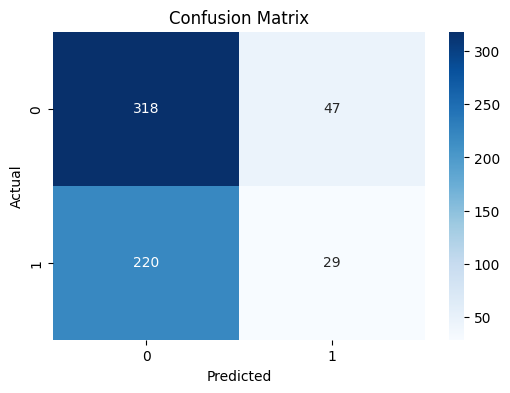

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

ROC-AUC: 0.5188


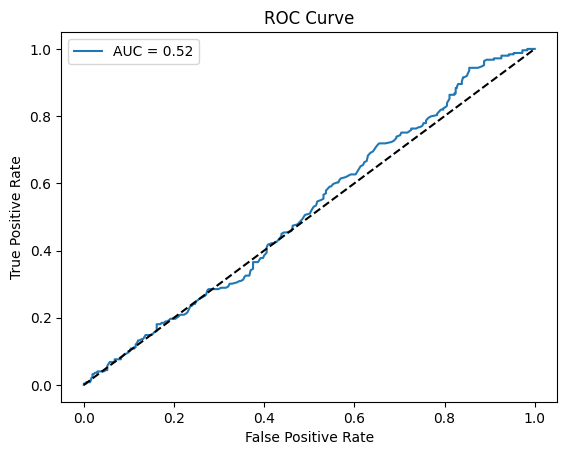

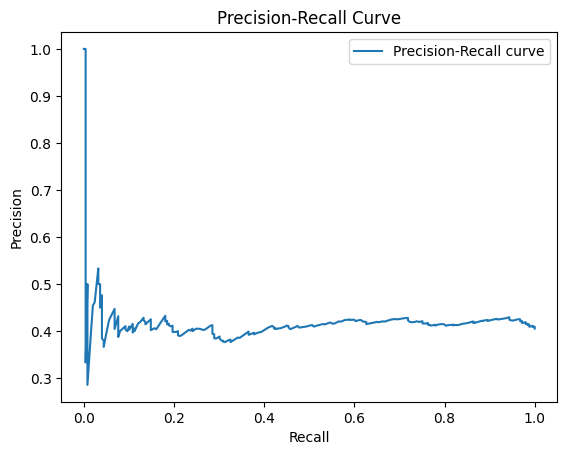

In [41]:
if len(np.unique(y)) == 2:  # Binary classification
    auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
    print(f"ROC-AUC: {auc_score:.4f}")
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
else:  # Multi-class
    auc_score = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
    print(f"ROC-AUC (OvR): {auc_score:.4f}")

if len(np.unique(y)) == 2:
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
    plt.plot(recall, precision, label="Precision-Recall curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.show()